# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [29]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [30]:
wine_df=pd.read_csv("winequality-red.csv")

In [31]:
wine_df.shape

(1599, 12)

In [32]:
wine_df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [33]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
wine_df.groupby(['quality']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638                  638                   638      638  638   
7              199                  199                   199      199  199   
8               18                   18                    18       18   18   

         sulphates  alcohol  
quality                      
3               10       10  
4               53       53  
5              681      681  
6              638      638  
7              199      199  
8               18       18

In [35]:
print("Class imbalance can be seen.Also, no missing values observed in any columns")

Class imbalance can be seen.Also, no missing values observed in any columns


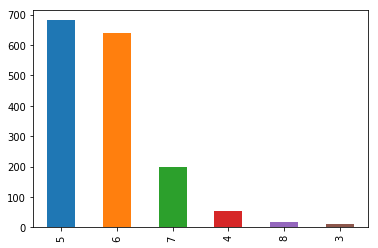

In [36]:
wine_df['quality'].value_counts().plot.bar()

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [37]:
wine_df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
342            10.9              0.39         0.47             1.8      0.118   
1051            8.5              0.46         0.59             1.4      0.414   
1383            8.0              0.60         0.22             2.1      0.080   
1038            8.7              0.41         0.41             6.2      0.078   
402            12.2              0.48         0.54             2.6      0.085   
891             7.2              0.66         0.03             2.3      0.078   
1058            9.9              0.53         0.57             2.4      0.093   
1368            8.0              0.77         0.32             2.1      0.079   
1005            6.8              0.36         0.32             1.8      0.067   
1373            7.7              0.75         0.27             3.8      0.110   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
342                   6.0                  14.0  0.99820  3.30       0.75   
1051                 16.0                  45.0  0.99702  3.03       1.34   
1383                 25.0                 105.0  0.99613  3.30       0.49   
1038                 25.0                  42.0  0.99530  3.24       0.77   
402                  19.0                  64.0  1.00000  3.10       0.61   
891                  16.0                  86.0  0.99743  3.53       0.57   
1058                 30.0                  52.0  0.99710  3.19       0.76   
1368                 16.0                  74.0  0.99656  3.27       0.50   
1005                  4.0                   8.0  0.99280  3.36       0.55   
1373                 34.0                  89.0  0.99664  3.24       0.45   

      alcohol  quality  
342       9.8        6  
1051      9.2        5  
1383      9.9        5  
1038     12.6        7  
402      10.5        6  
891       9.7        5  
1058     11.6        7  
1368      9.8        6  
1005     12.8        7  
1373      9.3        5

# Q3 Print the datatypes of each column and the shape of the dataset 

In [38]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [40]:
wine_df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

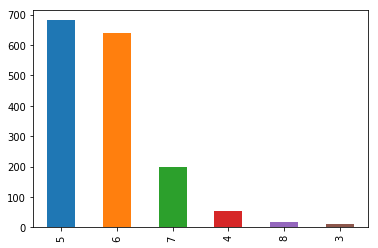

In [41]:
wine_df['quality'].value_counts().plot.bar()

In [42]:
print("Class imbalance can be observed")

Class imbalance can be observed


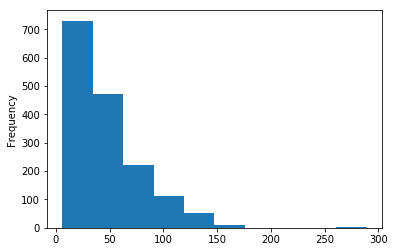

In [43]:
wine_df['total sulfur dioxide'].plot.hist()

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


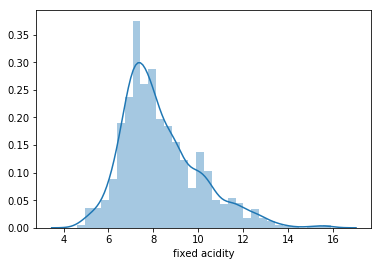

In [44]:
sns.distplot(wine_df['fixed acidity'])

In [45]:
## Fixed acidity is slightly right talied. However, fairly uniformly distributed around the mean

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


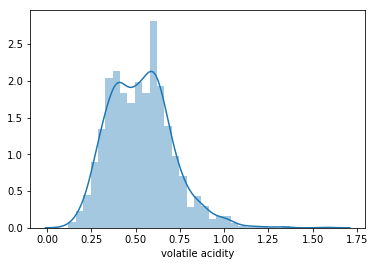

In [46]:
sns.distplot(wine_df['volatile acidity'])

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


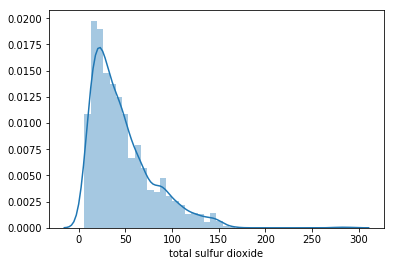

In [47]:
sns.distplot(wine_df['total sulfur dioxide'])

In [48]:
print("total sulfur dioxide shows right tailed distribution")

total sulfur dioxide shows right tailed distribution


# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


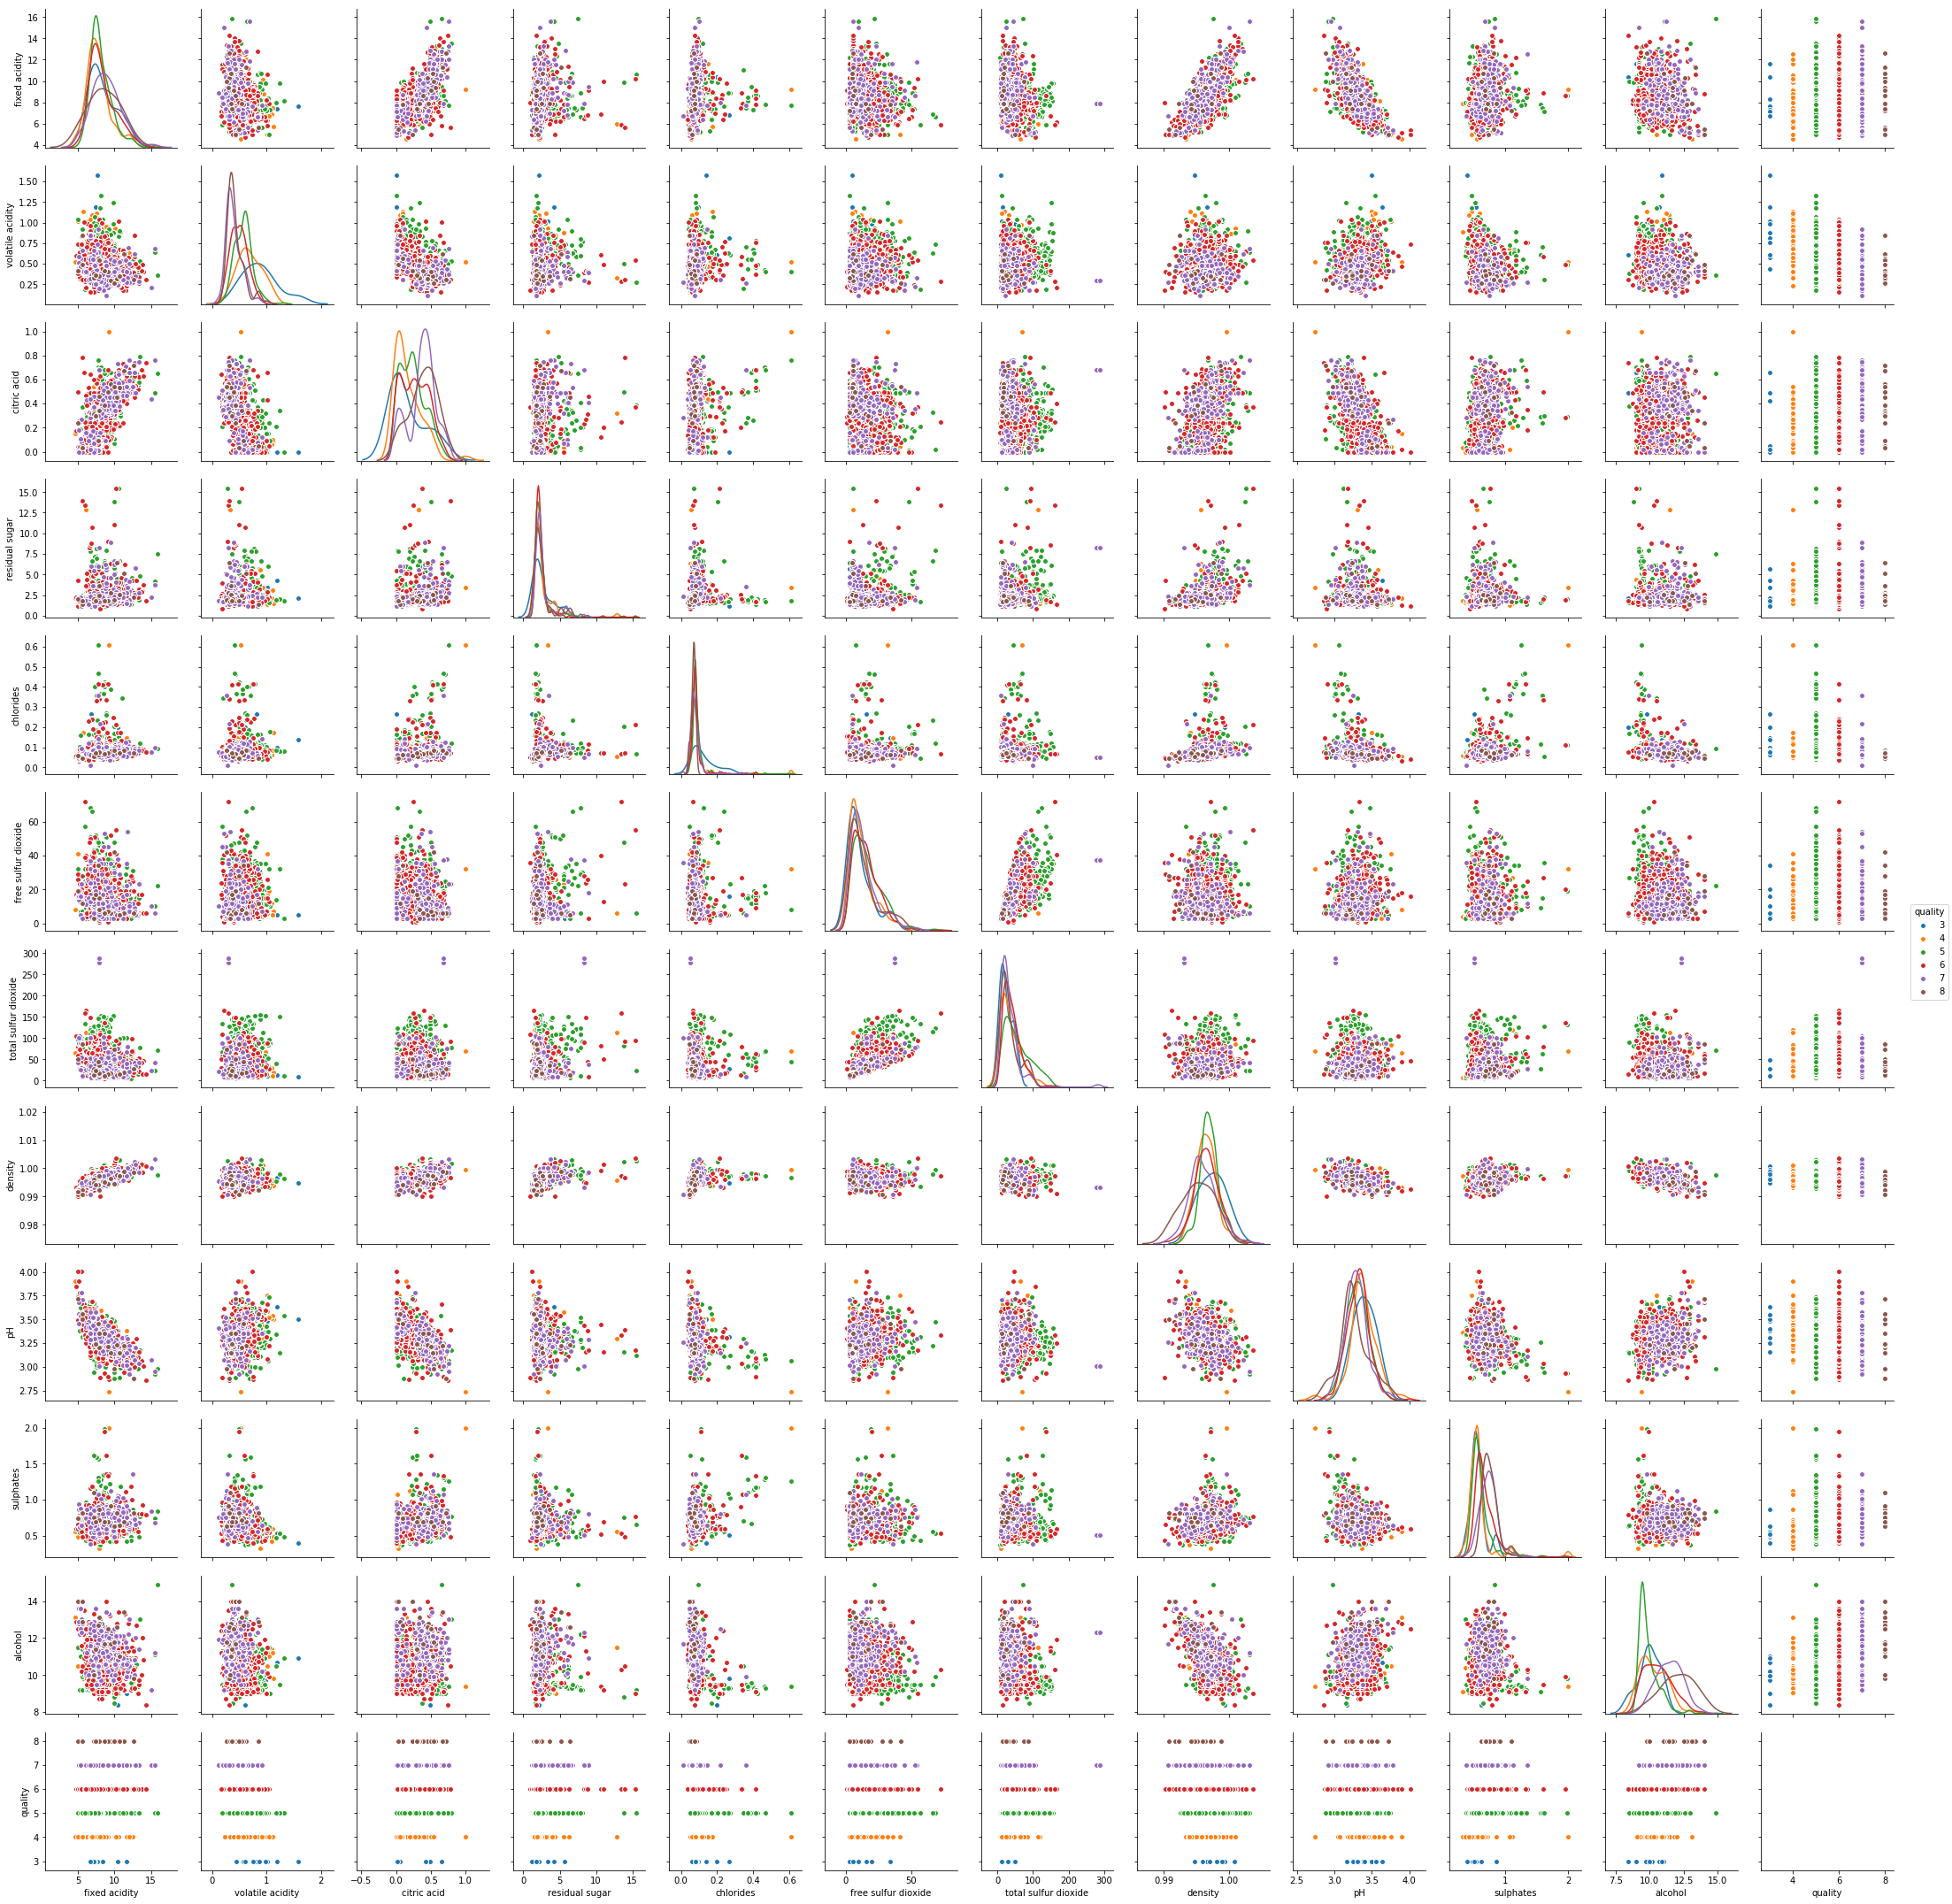

In [49]:
sns.pairplot(wine_df,hue="quality",diag_kind="kde")

In [50]:
#High quality wines usually have low density
#Total sulphur dioxide for low quality wines is low

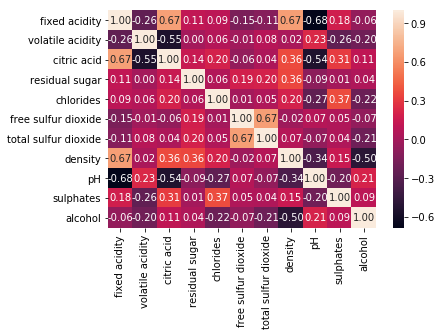

In [51]:
corr=wine_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].corr()
sns.heatmap(corr,annot=True,fmt='0.2f')

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [52]:
X=wine_df.drop("quality",axis=1)
y=wine_df.pop("quality")

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1) 

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [54]:
dt_model = DecisionTreeClassifier(criterion = "entropy")

In [55]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [56]:
print(dt_model.score(X_train, y_train))

1.0


In [57]:
y_predict = dt_model.predict(X_test)

In [58]:
print(dt_model.score(X_test, y_test))

0.5854166666666667


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.5854166666666667

In [60]:
from sklearn import tree

train_char_label = ['3','4','5','6','7','8']

dot_data = tree.export_graphviz(dt_model, out_file= "tree.dot" , feature_names = list(X_train), class_names = list(train_char_label))

#credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
fixed acidity         0.060600
volatile acidity      0.081423
citric acid           0.064198
residual sugar        0.090526
chlorides             0.072354
free sulfur dioxide   0.072029
total sulfur dioxide  0.103531
density               0.029258
pH                    0.075353
sulphates             0.138961
alcohol               0.211767


In [61]:
!pip install graphviz

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [62]:
from os import system
from IPython.display import Image


system("dot -Tpng tree.dot -o credit_tree.png")
Image("credit_tree.png")

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [63]:
dt_model5 = DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt_model5.fit(X_train,y_train)
print("Depth = 5")
print(dt_model5.score(X_train,y_train))
print(dt_model5.score(X_test,y_test))
y_predict=dt_model5.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict))

Depth = 5
0.6586237712243074
0.575
[[  0   0   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   0 160  41   6   0]
 [  0   0  71  93  31   0]
 [  0   0   4  25  23   0]
 [  0   0   0   0   3   0]]


In [64]:
dt_model7 = DecisionTreeClassifier(criterion="entropy",max_depth=7)
dt_model7.fit(X_train,y_train)
print("Depth = 7")
print(dt_model7.score(X_train,y_train))
print(dt_model7.score(X_test,y_test))
y_predict=dt_model7.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict))

Depth = 7
0.7479892761394102
0.5708333333333333
[[  0   0   1   0   1   0]
 [  0   1  13   6   1   0]
 [  0   4 157  44   2   0]
 [  0   2  71  94  27   1]
 [  0   0   5  25  22   0]
 [  0   0   0   1   2   0]]


In [65]:
dt_model9 = DecisionTreeClassifier(criterion="entropy",max_depth=9)
dt_model9.fit(X_train,y_train)
print("Depth = 9")
print(dt_model9.score(X_train,y_train))
print(dt_model9.score(X_test,y_test))
y_predict=dt_model9.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predict))

Depth = 9
0.8668453976764968
0.5833333333333334
[[  0   0   1   0   1   0]
 [  0   1  12   7   1   0]
 [  0   5 154  45   3   0]
 [  0   4  58 103  26   4]
 [  0   0   3  27  21   1]
 [  0   0   0   0   2   1]]


In [176]:
##We observe that the score dips at depth =7 and rises slightly thereafter. Hence, depth =7 should be the optimal depth for the DT.

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfcl = RandomForestClassifier(n_estimators=50)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.6958333333333333
[[  0   0   2   0   0   0]
 [  1   0  14   5   1   0]
 [  0   0 171  35   1   0]
 [  0   0  46 133  16   0]
 [  0   0   6  16  29   1]
 [  0   0   0   0   2   1]]


In [181]:
# Accuracy has significantly improved as compared to DecisionTreeClassifier

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(base_estimator=rfcl,n_estimators=10)
abcl=abcl.fit(X_train,y_train)

In [76]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predict))

0.6958333333333333
[[  0   0   2   0   0   0]
 [  1   0  15   5   0   0]
 [  0   0 172  35   0   0]
 [  0   0  48 138   9   0]
 [  0   0   6  22  23   1]
 [  0   0   0   0   2   1]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [79]:
from sklearn.ensemble import BaggingClassifier
bgcl= BaggingClassifier(base_estimator=rfcl,n_estimators=50)
bgcl=bgcl.fit(X_train,y_train)

In [80]:
y_predict=bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predict))

0.7020833333333333
[[  0   0   2   0   0   0]
 [  0   0  13   7   1   0]
 [  0   0 173  34   0   0]
 [  0   0  45 139  11   0]
 [  0   0   4  24  24   0]
 [  0   0   0   0   2   1]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [191]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=50)
gbcl=gbcl.fit(X_train,y_train)

In [192]:
y_predict=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predict))

0.6291666666666667
[[  0   0   2   0   0   0]
 [  0   1  14   5   1   0]
 [  0   1 160  45   1   0]
 [  0   1  53 120  21   0]
 [  1   0   5  22  21   3]
 [  0   0   0   1   2   0]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.